In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

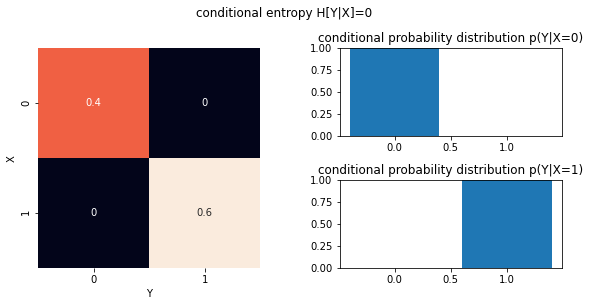

In [2]:
plt.figure(figsize=(8, 4))
ax1 = plt.subplot(121)
pXY = [[0.4, 0], [0, 0.6]]
sns.heatmap(pXY, annot=True, cbar=False)
plt.xlabel("Y")
plt.ylabel("X")

plt.subplot(222)
plt.bar([0, 1], [1, 0])
plt.ylim(0, 1)
plt.title("conditional probability distribution p(Y|X=0)")

plt.subplot(224)
plt.bar([0, 1], [0, 1])
plt.ylim(0, 1)
plt.title("conditional probability distribution p(Y|X=1)")

plt.tight_layout(w_pad=5)
plt.suptitle("conditional entropy H[Y|X]=0", y=1.05)

plt.show();

In [ ]:
# 엔트로피

In [3]:
sp.stats.entropy([1/3, 2/3], base=2)

0.9182958340544894

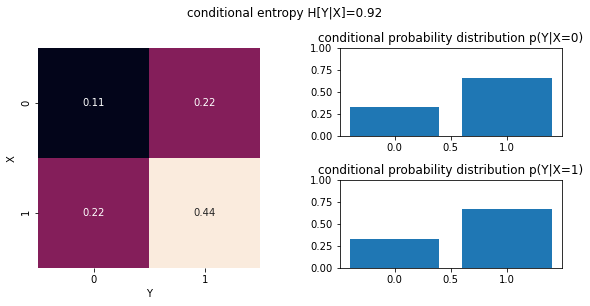

In [4]:
plt.figure(figsize=(8, 4))
ax1 = plt.subplot(121)
pXY = [[1/9, 2/9], [2/9, 4/9]]
sns.heatmap(pXY, annot=True, cbar=False)
plt.xlabel("Y")
plt.ylabel("X")

plt.subplot(222)
plt.bar([0, 1], [1/3, 2/3])
plt.ylim(0, 1)
plt.title("conditional probability distribution p(Y|X=0)")

plt.subplot(224)
plt.bar([0, 1], [1/3, 2/3])
plt.ylim(0, 1)
plt.title("conditional probability distribution p(Y|X=1)")

plt.tight_layout(w_pad=5)
plt.suptitle("conditional entropy H[Y|X]=0.92", y=1.05)

plt.show();

In [ ]:
# 조건부엔트로피를 사용한 붓꽃 분류
# 붓꽃 데이터 중 버지니카(virginica)와 베르시칼라(versicolor) 종의 데이터만 임포트

In [5]:
from sklearn.datasets import load_iris

iris = load_iris()
idx = np.in1d(iris.target, [1, 2])
X = iris.data[idx, :]
y = iris.target[idx]
df = pd.DataFrame(X, columns=iris.feature_names)
df["species"] = iris.target[idx]

df.tail()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
95                6.7               3.0                5.2               2.3   
96                6.3               2.5                5.0               1.9   
97                6.5               3.0                5.2               2.0   
98                6.2               3.4                5.4               2.3   
99                5.9               3.0                5.1               1.8   

    species  
95        2  
96        2  
97        2  
98        2  
99        2

C:\Users\choeu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\choeu\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\choeu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\choeu\anaconda3\lib\site-packages\seaborn\distr

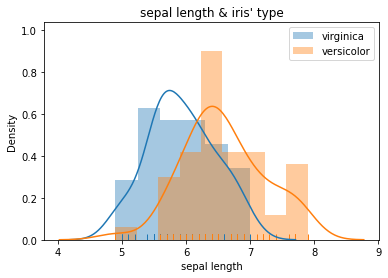

In [6]:
sns.distplot(df[df.species == 1]["sepal length (cm)"], hist=True, rug=True, label="virginica")
sns.distplot(df[df.species == 2]["sepal length (cm)"], hist=True, rug=True, label="versicolor")
plt.legend()
plt.xlabel("sepal length")
plt.title("sepal length & iris' type")

plt.show();

In [ ]:
# 꽃받침의 길이(sepal length)로 두 종을 구별하고자 할 때 기준값은?
# 6cm를 기준으로 구분하면

In [7]:
df["X1"] = df["sepal length (cm)"] > 6
pivot_table1 = df.groupby(["X1", "species"]).size().unstack().fillna(0)
pivot_table1

species   1   2
X1             
False    30   9
True     20  41

In [ ]:
# 조건부엔트로피

In [8]:
def cond_entropy(v):
    pYX0 = v[0, :] / np.sum(v[0, :])
    pYX1 = v[1, :] / np.sum(v[1, :])
    HYX0 = sp.stats.entropy(pYX0, base=2)
    HYX1 = sp.stats.entropy(pYX1, base=2)
    HYX = np.sum(v, axis=1) @ [HYX0, HYX1] / np.sum(v)
    return HYX

cond_entropy(pivot_table1.values)

0.860714271586387

In [ ]:
# 6.5